### Skip-Gram 모델 구현

In [1]:
from mynlp import preprocess, create_contexts_target, convert_one_hot
from nn_layers import MatMul, SoftmaxWithLoss, Adam, SGD, Trainer
import numpy as np

# contexts와 target을 구하는 함수 : mynlp.py에 추가해 놓는다
# convert_one_hot 원핫 변환 함수 : mynlp.py 에 추가해 놓는다
# Trainer 클래스  : nn_layers에 추가해 놓는다

In [2]:
class SimpleSkipGram:
    def __init__(self,vocab_size, hidden_size): # vocab_size=7,hidden_size5
        V, H = vocab_size, hidden_size
        
        # 가중치 초기화
        W_in = 0.01*np.random.randn(V,H).astype('f') # (7,5)
        W_out = 0.01*np.random.randn(H,V).astype('f') # (5,7)
        
        # 계층 생성
        self.in_layer = MatMul(W_in)         # (6,7)*(7,5) = (6,5)
        self.out_layer = MatMul(W_out)       # (6,5)*(5,7) = (6,7)
        self.loss_layer1 = SoftmaxWithLoss()
        self.loss_layer2 = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer, self.out_layer]
        self.params, self.grads = [],[]
        for layer in layers : # 2회
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수 단어의 분산 표현을 저장한다.    
        self.word_vec = W_in 
        
    def predict(self, target):  # target: 입력값
        h = self.in_layer.forward(target)
        s = self.out_layer.forward(h)
        return s
        
    def forward(self, contexts, target):  # contexts : 실제값  (6,2,7) 3차원, target: 입력값
        h = self.in_layer.forward(target)  # (6,5)
        s = self.out_layer.forward(h)      # (6,7)
        l1 = self.loss_layer1.forward(s,contexts[:,0])
        l2 = self.loss_layer2.forward(s,contexts[:,1])
        loss = l1 + l2
        return loss
    
    def backward(self, dout=1):
        dl1 = self.loss_layer1.backward(dout)
        dl2 = self.loss_layer2.backward(dout)
        ds = dl1 + dl2
        dh = self.out_layer.backward(ds)
        self.in_layer.backward(dh)
        return None

## 학습 코드 구현

In [3]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.' 
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts,target = create_contexts_target(corpus,window_size)

target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

print(contexts,contexts.shape)
print(target,target.shape)

# 중앙의 단어(타깃)으로부터 주변의 여러 단어(맥락)를 예측한다

[[[1 0 0 0 0 0 0]
  [0 0 1 0 0 0 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0]
  [0 0 0 0 1 0 0]]

 [[0 0 0 1 0 0 0]
  [0 1 0 0 0 0 0]]

 [[0 0 0 0 1 0 0]
  [0 0 0 0 0 1 0]]

 [[0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1]]] (6, 2, 7)
[[0 1 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0]] (6, 7)


In [4]:
model = SimpleSkipGram(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model,optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 3.89
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 3.88
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 3.87
| 에폭 26 |

| 에폭 211 |  반복 1 / 2 | 시간 0[s] | 손실 2.86
| 에폭 212 |  반복 1 / 2 | 시간 0[s] | 손실 2.53
| 에폭 213 |  반복 1 / 2 | 시간 0[s] | 손실 2.73
| 에폭 214 |  반복 1 / 2 | 시간 0[s] | 손실 2.52
| 에폭 215 |  반복 1 / 2 | 시간 0[s] | 손실 2.57
| 에폭 216 |  반복 1 / 2 | 시간 0[s] | 손실 2.85
| 에폭 217 |  반복 1 / 2 | 시간 0[s] | 손실 2.58
| 에폭 218 |  반복 1 / 2 | 시간 0[s] | 손실 2.64
| 에폭 219 |  반복 1 / 2 | 시간 0[s] | 손실 2.62
| 에폭 220 |  반복 1 / 2 | 시간 0[s] | 손실 2.56
| 에폭 221 |  반복 1 / 2 | 시간 0[s] | 손실 2.69
| 에폭 222 |  반복 1 / 2 | 시간 0[s] | 손실 2.62
| 에폭 223 |  반복 1 / 2 | 시간 0[s] | 손실 2.46
| 에폭 224 |  반복 1 / 2 | 시간 0[s] | 손실 2.76
| 에폭 225 |  반복 1 / 2 | 시간 0[s] | 손실 2.68
| 에폭 226 |  반복 1 / 2 | 시간 0[s] | 손실 2.58
| 에폭 227 |  반복 1 / 2 | 시간 0[s] | 손실 2.61
| 에폭 228 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 229 |  반복 1 / 2 | 시간 0[s] | 손실 2.67
| 에폭 230 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 231 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 232 |  반복 1 / 2 | 시간 0[s] | 손실 2.50
| 에폭 233 |  반복 1 / 2 | 시간 0[s] | 손실 2.73
| 에폭 234 |  반복 1 / 2 | 시간 0[s] | 손실 2.49
| 에폭 235 |  반복 1

| 에폭 463 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 464 |  반복 1 / 2 | 시간 0[s] | 손실 1.89
| 에폭 465 |  반복 1 / 2 | 시간 0[s] | 손실 2.42
| 에폭 466 |  반복 1 / 2 | 시간 0[s] | 손실 1.92
| 에폭 467 |  반복 1 / 2 | 시간 0[s] | 손실 2.20
| 에폭 468 |  반복 1 / 2 | 시간 0[s] | 손실 1.87
| 에폭 469 |  반복 1 / 2 | 시간 0[s] | 손실 2.10
| 에폭 470 |  반복 1 / 2 | 시간 0[s] | 손실 2.01
| 에폭 471 |  반복 1 / 2 | 시간 0[s] | 손실 2.28
| 에폭 472 |  반복 1 / 2 | 시간 0[s] | 손실 1.84
| 에폭 473 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 474 |  반복 1 / 2 | 시간 0[s] | 손실 1.62
| 에폭 475 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 476 |  반복 1 / 2 | 시간 0[s] | 손실 2.27
| 에폭 477 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 478 |  반복 1 / 2 | 시간 0[s] | 손실 1.65
| 에폭 479 |  반복 1 / 2 | 시간 0[s] | 손실 2.23
| 에폭 480 |  반복 1 / 2 | 시간 0[s] | 손실 2.05
| 에폭 481 |  반복 1 / 2 | 시간 0[s] | 손실 2.03
| 에폭 482 |  반복 1 / 2 | 시간 0[s] | 손실 2.06
| 에폭 483 |  반복 1 / 2 | 시간 0[s] | 손실 2.04
| 에폭 484 |  반복 1 / 2 | 시간 0[s] | 손실 2.08
| 에폭 485 |  반복 1 / 2 | 시간 0[s] | 손실 2.01
| 에폭 486 |  반복 1 / 2 | 시간 0[s] | 손실 2.03
| 에폭 487 |  반복 1

| 에폭 745 |  반복 1 / 2 | 시간 1[s] | 손실 1.70
| 에폭 746 |  반복 1 / 2 | 시간 1[s] | 손실 2.15
| 에폭 747 |  반복 1 / 2 | 시간 1[s] | 손실 1.46
| 에폭 748 |  반복 1 / 2 | 시간 1[s] | 손실 2.16
| 에폭 749 |  반복 1 / 2 | 시간 1[s] | 손실 1.90
| 에폭 750 |  반복 1 / 2 | 시간 1[s] | 손실 1.92
| 에폭 751 |  반복 1 / 2 | 시간 1[s] | 손실 2.13
| 에폭 752 |  반복 1 / 2 | 시간 1[s] | 손실 1.71
| 에폭 753 |  반복 1 / 2 | 시간 1[s] | 손실 1.91
| 에폭 754 |  반복 1 / 2 | 시간 1[s] | 손실 2.15
| 에폭 755 |  반복 1 / 2 | 시간 1[s] | 손실 1.68
| 에폭 756 |  반복 1 / 2 | 시간 1[s] | 손실 1.94
| 에폭 757 |  반복 1 / 2 | 시간 1[s] | 손실 1.91
| 에폭 758 |  반복 1 / 2 | 시간 1[s] | 손실 2.14
| 에폭 759 |  반복 1 / 2 | 시간 1[s] | 손실 1.67
| 에폭 760 |  반복 1 / 2 | 시간 1[s] | 손실 2.14
| 에폭 761 |  반복 1 / 2 | 시간 1[s] | 손실 1.92
| 에폭 762 |  반복 1 / 2 | 시간 1[s] | 손실 1.69
| 에폭 763 |  반복 1 / 2 | 시간 1[s] | 손실 1.91
| 에폭 764 |  반복 1 / 2 | 시간 1[s] | 손실 1.91
| 에폭 765 |  반복 1 / 2 | 시간 1[s] | 손실 1.91
| 에폭 766 |  반복 1 / 2 | 시간 1[s] | 손실 1.93
| 에폭 767 |  반복 1 / 2 | 시간 1[s] | 손실 2.13
| 에폭 768 |  반복 1 / 2 | 시간 1[s] | 손실 1.47
| 에폭 769 |  반복 1

| 에폭 991 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 992 |  반복 1 / 2 | 시간 1[s] | 손실 1.88
| 에폭 993 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 994 |  반복 1 / 2 | 시간 1[s] | 손실 1.87
| 에폭 995 |  반복 1 / 2 | 시간 1[s] | 손실 1.89
| 에폭 996 |  반복 1 / 2 | 시간 1[s] | 손실 1.88
| 에폭 997 |  반복 1 / 2 | 시간 1[s] | 손실 1.66
| 에폭 998 |  반복 1 / 2 | 시간 1[s] | 손실 1.88
| 에폭 999 |  반복 1 / 2 | 시간 1[s] | 손실 2.11
| 에폭 1000 |  반복 1 / 2 | 시간 1[s] | 손실 2.11


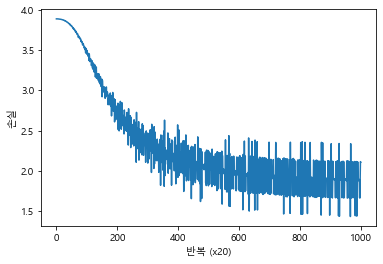

In [5]:
trainer.plot()

In [6]:
# W_in : 인스턴스 변수인 단어의 분산 표현
word_vecs = model.word_vec # (7,5)

for word_id, word in id_to_word.items():
    print('%10s : '%word, word_vecs[word_id])

       you :  [-0.00758125 -0.01290127 -0.00641202  0.00128476  0.00085665]
       say :  [ 0.95044154  0.9314795  -0.70732677  0.8925222   0.7799943 ]
   goodbye :  [-0.7809585 -0.7842692  1.3433037 -0.7612266 -0.8546133]
       and :  [0.9035693  0.89364576 1.3286731  0.90982825 1.0341243 ]
         i :  [-0.7652791 -0.7767331  1.3386022 -0.7664077 -0.8747484]
     hello :  [-0.93595576 -0.907594   -1.1957619  -0.9266631  -0.7652276 ]
         . :  [-0.0047222   0.00169842  0.01096897 -0.00301306  0.0008738 ]


### 예측과 정확도 평가

In [7]:
# 예측
h = model.predict(target)
# print(h)
print(h.shape) # (6,7)

(6, 7)


In [8]:
h = model.predict(target[0,:])  # [0, 1, 0, 0, 0, 0, 0],'say', (7,)
print(h.shape)   # (7,)
print(h)
pred0 = np.argmax(h,0)
h1 = h
h1[pred0] = 0
pred1 = np.argmax(h1,0)

c0 = np.argmax(contexts[0,0,:],0)
c1 = np.argmax(contexts[0,1,:],0)

print('contexs : ', c0,c1)
print('predict : ', pred0,pred1)

(7,)
[ 2.27354178 -4.43652032  2.3069968  -3.409496    2.30807997  2.27412031
 -1.33273333]
contexs :  0 2
predict :  4 2


In [9]:
h = model.predict(target[1,:])  # [0, 0, 1, 0, 0, 0, 0],'goodbye', (7,)
print(h.shape)   # (7,)
print(h)
pred0 = np.argmax(h,0)
h1 = h
h1[pred0] = 0
pred1 = np.argmax(h1,0)

c0 = np.argmax(contexts[1,0,:],0)
c1 = np.argmax(contexts[1,1,:],0)

print('contexs : ', c0,c1)
print('predict : ', pred0,pred1)

(7,)
[-2.57756544  4.07257235 -1.49873347  4.06959386 -1.5001764  -2.58753086
  0.07374391]
contexs :  1 3
predict :  1 3
